There are several ways of penalizing models in Neural Networks. Here we will use weight decay penalty, which is a regularization term that penalizes big weighs. When the weight decay coefficient, the penalty for big weights is also big, when it is small weights can freely grow. Large weights in a neural network are a sign of a more complex network that most likely has overfit on the training data. The reason that applying regularization is to increase the magnitude of parameter values in order to reduce overfitting. <br>
If the penalty is too strong, the model will underestimate the weights and underfit will occur. Contrarily, if the penalty is too weak, the model will be allowed to overfit the training data.<br>
In order to decide regularization hyper-parameter, using logarithmic scale enables us to search a bigger space quickly.<br>

In [104]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
import random
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed=7
np.random.seed(seed)
# load dataset
dataset= np.loadtxt("pima-indians-diabetes.csv",delimiter=",")

# Split dataset into input (X) and output (Y) variables
X=dataset[:,0:8]
Y=dataset[:,8]

# Adding bias to the input and splitting
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

# Scale the data
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)  
X_val = scaler.transform(X_val)  

In [105]:
# Define parameters
#hyper_parameter = 10. ** np.arange(-8,8)
hyper_parameter = np.logspace(-3,3,100)
repeat = 3
Epoch = 1000
score_train = []
score_test = []
log_loss_train = []
log_loss_val = []
sc_train = []
sc_test = []   
no_of_nod = 100

no_of_layer = 50

# Create classifiers with different alpha values from logarithmic scale
classifiers = []
for i in hyper_parameter:
    classifiers.append(MLPClassifier(solver='adam', alpha=i, random_state=0,
                                     hidden_layer_sizes=[no_of_nod, no_of_layer], max_iter = Epoch))

In [106]:
#Cross entropy loss
from sklearn.metrics import log_loss

# Fit the model and calculate score        
for clf in classifiers:
        clf.fit(X_train, y_train)
        score = clf.score(X_val, y_val)        
        
        clf.fit(X_train, y_train)
        y_pred_val = clf.predict(X_val)
        y_pred_train = clf.predict(X_train)

        sc_train.append(clf.score(X_train, y_train))
        sc_test.append(clf.score(X_val, y_val))
        
        log_ls_val = log_loss(y_val, y_pred_val)
        log_ls_train = log_loss(y_train, y_pred_train)
        
        log_loss_val.append(log_ls_val)
        log_loss_train.append(log_ls_train)

In [113]:
#Plot Log-Loss
plt.rcParams.update({'font.size': 14})
fig = plt.subplots(1, 1, figsize=(12,8))
plt.semilogx(hyper_parameter,log_loss_train, linewidth=3)
plt.semilogx(hyper_parameter, log_loss_val, linewidth=3)
plt.legend(['Train', 'Validation'])
plt.ylabel("Log-Loss", {'size': 16})
plt.xlabel("Regularization (alpha)", {'size': 16})
plt.title("Effect of alpha hyper-parameter on Cross-Entrophy Loss, Number of Layers=" + str(no_of_layer))
#plt.ylim(0.5, 1)
#plt.xlim(hyper_parameter[0], hyper_parameter[-1])
plt.savefig('logLossE' + str(Epoch) + 'lyr' + str(no_of_layer) +'.png')
#plt.show()
plt.close()

In [114]:
#Plot Accuracy
plt.rcParams.update({'font.size': 14})
fig = plt.subplots(1, 1, figsize=(12, 8))
plt.semilogx(hyper_parameter, sc_train,linewidth=3, color = 'red')
plt.semilogx(hyper_parameter, sc_test,linewidth=3, color = 'green')
plt.legend(['Train', 'Validation'])
plt.ylabel("Accuracy",{'size': 16})
plt.xlabel("Regularization (alpha)", {'size': 16})
plt.title("Effect of alpha hyper-parameter on overfitting, Number of Layers=" + str(no_of_layer))
plt.ylim(0.5, 1)
plt.savefig('AccuracyE' + str(Epoch) + 'lyr' + str(no_of_layer) +'.png')
#plt.show()
plt.close()

Here is different graphs that shows the change in accuracy for different values from logarithmic scale of α. In each graph, layer numbers have been changed.

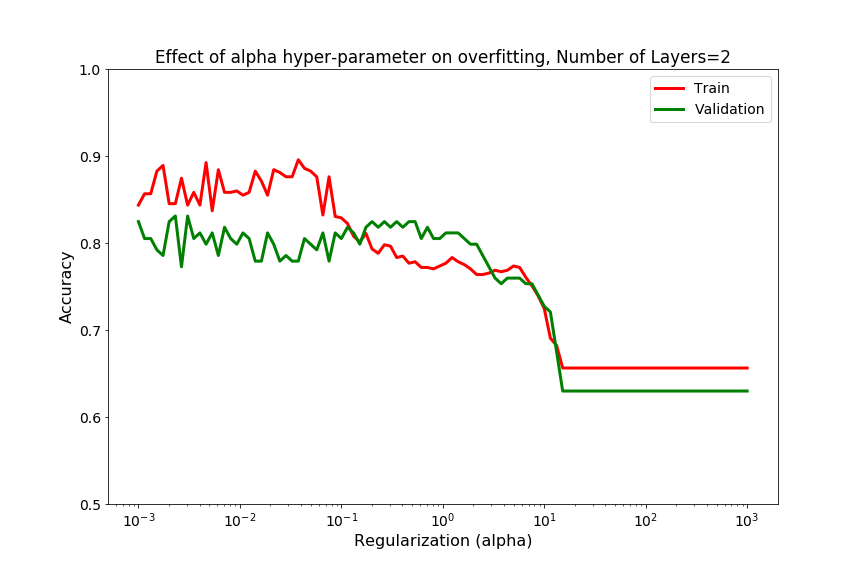, 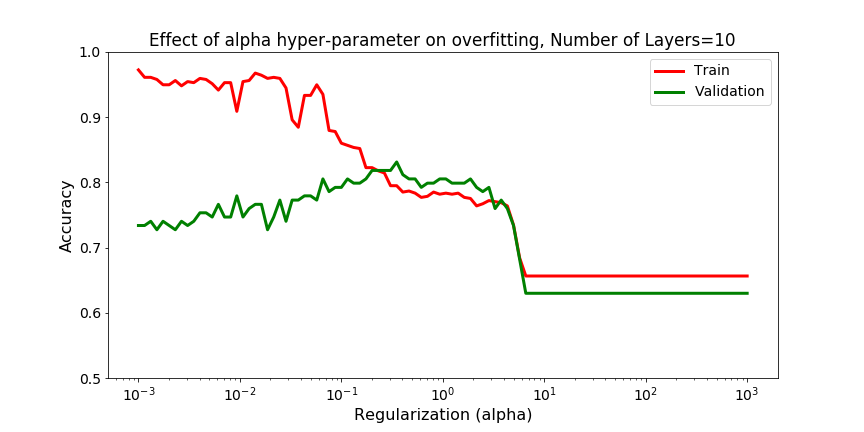

Behaviour of the curves are almost the same in both graphs. Accuracy of both of train and validation set is started with higher accuracy in 10 layers model. Then, the values in both graph are stabilizied.<br>We also observe that the curve in model with 10 layers, is learned with bigger rate. This is because of the increment in ability of the model. More layers makes model more complex, however, until we get overfitting that makes our model more strong.<br><br> As we expressly see from the graphs train set always starts with better accuracy. The reason of this, model also learns the outputs for train set, so that it is easier for it to predict. But the situation is not the same for validation set. Model improves its accuracy by learning. <br><br>We clearly realize the effect of ``alpha`` regularization hyper-parameter, from the point that ``α`` was between 1 and 10. <br> While we expect curves to stabilize after they have shown their natural trend, as I explained above, accuracy has started to decrease instead.<br><br>Hyper-parameter controls the learning process. This parameter is being used to penalty the neural network that is 'missed'.<br>There are several ways of penalizing models in Neural Networks. Here used weight decay penalty, which is a regularization term that penalizes big weighs. When the weight decay coefficient, the penalty for big weights is also big, when it is small weights can freely grow. Large weights in a neural network are a sign of a more complex network that most likely has overfit on the training data. The reason that applying regularization is to increase the magnitude of parameter values in order to reduce overfitting.
If the penalty is too strong, the model underestimates the weights and underfit occurs. Contrarily, if the penalty is too weak, the model would be allowed to overfit the training data.<br>
In order to decide regularization hyper-parameter, using logarithmic scale enables us to search a bigger space quickly.<br>

Log loss is being used to measure cross-entrophy error. Two graphs above shows error change for logarithmic scale of ``α``.

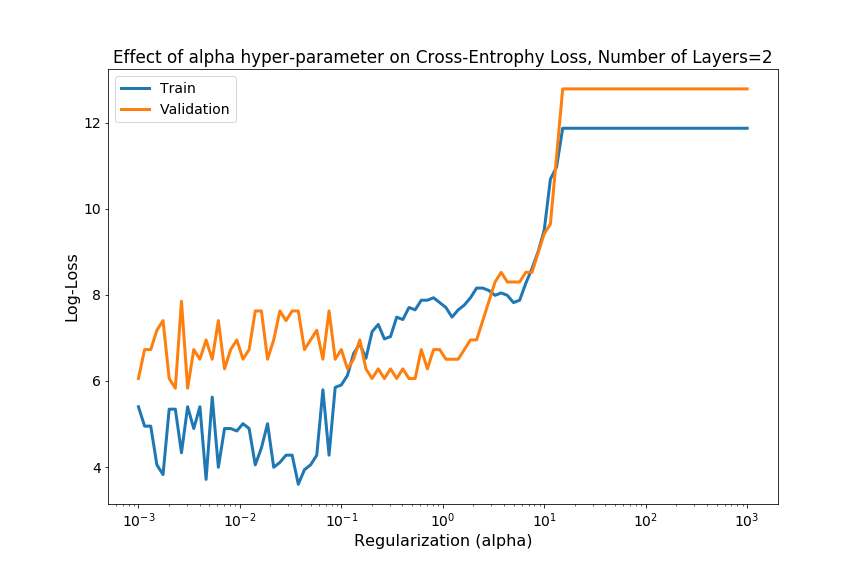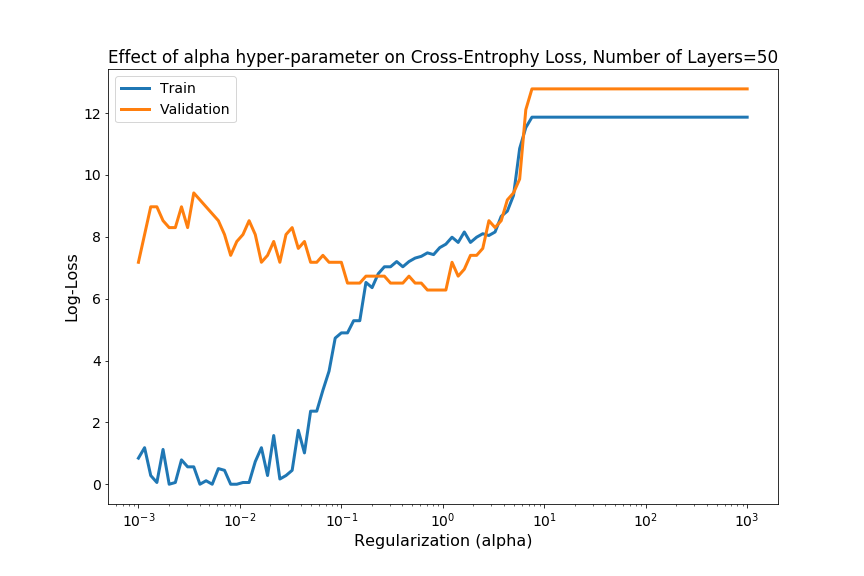

It is not surprising to see that error is initiated in smaller level for 50 layers. However, error of train test is significantly increased, where it will be beaten by validation error in last steps of our range. 

Finally, in order to prove that our model learns well and improves its accuracy, I will show accuracy-epoch graph.

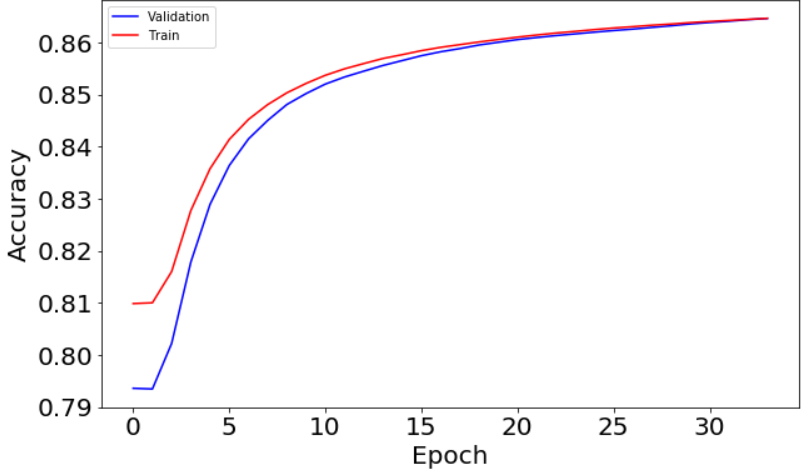

Accuracy of both validation and train has been equaled as it should be. But we have observed that, with the effect of hyper-parameter, we had resulted different values for train/validation where they stabilized.